In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos = np.genfromtxt('ejemplo-s10.txt')
x = datos[:,0]
y = datos[:,1]
print(x)

[-5.  -4.8 -4.6 -4.4 -4.2 -4.  -3.8 -3.6 -3.4 -3.2 -3.  -2.8 -2.6 -2.4 -2.2
 -2.  -1.8 -1.6 -1.4 -1.2 -1.  -0.8 -0.6 -0.4 -0.2  0.   0.2  0.4  0.6  0.8
  1.   1.2  1.4  1.6  1.8  2.   2.2  2.4  2.6  2.8  3.   3.2  3.4  3.6  3.8
  4.   4.2  4.4  4.6  4.8  5. ]


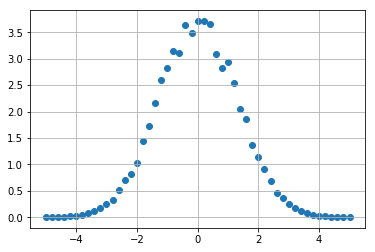

In [3]:
plt.scatter(x,y)
plt.grid(True)

In [4]:
from scipy.optimize import curve_fit

\begin{equation}
y = y_0 e^{-\alpha x^2}
\end{equation}

In [21]:
def f(x, a ,b):
    return b*np.exp(-a*x**2)

In [22]:
curve_fit(f,x,y)

(array([ 0.29185673,  3.68974044]),
 array([[  3.13917786e-05,   9.92152464e-05],
        [  9.92152464e-05,   9.40714653e-04]]))

In [23]:
ao ,bo = curve_fit(f,x,y)[0]

In [38]:
ao,bo

(0.29185672889036551, 3.6897404437032044)

In [36]:
xx = np.linspace(-4,4,100)
def p(a=1,b=1,c=1):
    plt.scatter(x,y)
    plt.plot(xx,f(xx,a,b), color ='red')
    plt.xlim(-4,4)
    plt.ylim(0,4)
    plt.grid(True)
    chi2 = np.sum((y - f(x,a,b))**2)
    print(chi2)

0.356454057608


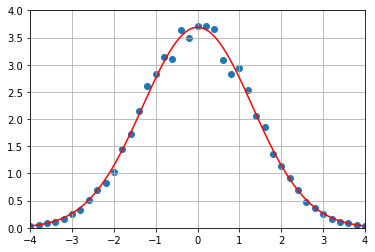

In [37]:
p(ao,bo)

In [39]:
from scipy.optimize import leastsq

In [40]:
def res(p,x,y):
    return y - (p[1]*np.exp(-p[0]*x**2))

In [41]:
p_ini = [0.3,3.7]

In [42]:
leastsq(res,p_ini,args=(x,y))

(array([ 0.2918568 ,  3.68974066]), 1)

In [43]:
leastsq(res,p_ini,args=(x,y))[0]

array([ 0.2918568 ,  3.68974066])

In [44]:
curve_fit(f,x,y)[0]

array([ 0.29185673,  3.68974044])

In [46]:
j, k = leastsq(res,p_ini,args=(x,y))[0]

0.356454057607


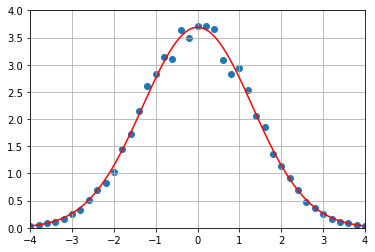

In [47]:
p(j,k)